# Learning objectives

1. Introduce pandas
1. More matplotlib

# Load packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load K4me3.bed

In [3]:
bed_columns = ["chr", "start", "end"]
df_k4 = pd.read_table( "../../qbb2020/data/K4me3.bed", names=bed_columns )
df_k4

/home/protein/Downloads/miniconda3/envs/md/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,chr,start,end
0,3L,15823270,15830715
1,2R,11451787,11459612
2,3R,21665759,21673392
3,2R,20324929,20331038
4,3R,19859679,19864278
5,X,16780987,16791625
6,X,19681104,19685973
7,3L,14781905,14791724
8,2R,24868625,24876436
9,2L,8081562,8085704


In [4]:
type( df_k4 )

pandas.core.frame.DataFrame

# Work with data frames

In [5]:
df_k4.columns

Index(['chr', 'start', 'end'], dtype='object')

In [6]:
df_k4.index

RangeIndex(start=0, stop=3830, step=1)

In [7]:
df_k4.values

array([['3L', 15823270, 15830715],
       ['2R', 11451787, 11459612],
       ['3R', 21665759, 21673392],
       ..., 
       ['3R', 4477321, 4479529],
       ['3L', 711347, 711871],
       ['2L', 6792695, 6795077]], dtype=object)

In [8]:
df_k4.shape

(3830, 3)

In [9]:
df_k4.loc[0,"chr"]

'3L'

In [10]:
df_k4.loc[:,"chr"]

0       3L
1       2R
2       3R
3       2R
4       3R
5        X
6        X
7       3L
8       2R
9       2L
10      3L
11      3R
12      2L
13      3R
14      2L
15      3L
16      3R
17       X
18      3R
19      3R
20      3R
21      3R
22      2R
23      2L
24      3R
25      2R
26      2R
27      2L
28       X
29      3R
        ..
3800     X
3801    3L
3802     X
3803     X
3804     X
3805    3R
3806    2L
3807    3R
3808     4
3809    3R
3810    2R
3811    3R
3812    2R
3813    2L
3814    2L
3815     X
3816    2R
3817    3R
3818    3R
3819    2R
3820    2L
3821    3R
3822    2L
3823    2L
3824    2L
3825    3R
3826    2L
3827    3R
3828    3L
3829    2L
Name: chr, Length: 3830, dtype: object

# Chromosomes

## Demo

In [11]:
chr_k4 = df_k4.loc[:,"chr"]
chr_k4 = chr_k4.value_counts()
chr_k4

3R                     897
2R                     799
3L                     773
2L                     713
X                      580
4                       65
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64

In [12]:
type( chr_k4 )

pandas.core.series.Series

In [13]:
chr_k4.shape

(8,)

In [14]:
chr_k4.loc["2L"]

713

In [15]:
coi = ["2L", "2R"]
chr_k4.loc[ coi ]

2L    713
2R    799
Name: chr, dtype: int64

In [16]:
chr_k4.index

Index(['3R', '2R', '3L', '2L', 'X', '4', 'Y', 'Y_CP007111v1_random'], dtype='object')

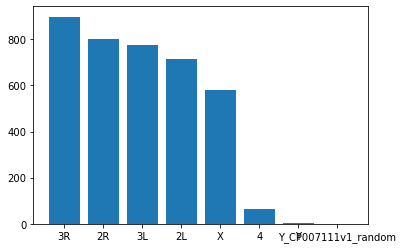

In [17]:
fig, ax = plt.subplots()
ax.bar( chr_k4.index, chr_k4 )
plt.show()

## Question 1: Tidy up K4

### Sort the chromosomes

In [19]:
chr_k4.sort_index()

2L                     713
2R                     799
3L                     773
3R                     897
4                       65
X                      580
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64

### Add a title, and axis labels

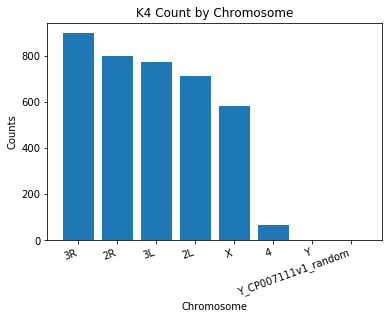

In [40]:
fig, ax = plt.subplots()
ax.bar( chr_k4.index, chr_k4 )
ax.set_title("K4 Count by Chromosome")
ax.set_xlabel("Chromosome")
ax.set_ylabel("Counts")
plt.xticks(rotation=20,ha='right') # turns the xticks to an angle
plt.show()

## Question 2: Subplot K9 K27

1. Plot K4, K9, and K27 chromosome distributions on the same plot as subplots.

#### Load K9 and K27 chromosome distributions

In [33]:
bed_columns = ["chr", "start", "end"]
df_k9 = pd.read_table( "../../qbb2020/data/K9me3.bed", names=bed_columns )
df_k27 = pd.read_table( "../../qbb2020/data/K27me3.bed", names=bed_columns )
print(df_k9.shape)
print(df_k27.shape)

(296, 3)
(431, 3)


/home/protein/Downloads/miniconda3/envs/md/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/home/protein/Downloads/miniconda3/envs/md/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Load K9 and K27 chromosome distributions and sort by index

In [38]:
chr_k9 = df_k9.loc[:,"chr"]
chr_k9 = chr_k9.value_counts()
chr_k9.sort_index()
print(chr_k9)

print('\n')

chr_k27 = df_k27.loc[:,"chr"]
chr_k27 = chr_k27.value_counts()
chr_k27.sort_index()
print(chr_k27)

3L                     67
X                      61
2L                     53
3R                     51
2R                     50
4                      11
Y                       2
Y_DS483690v1_random     1
Name: chr, dtype: int64


2R               102
3R                90
3L                89
2L                80
X                 64
4                  5
Un_CP007080v1      1
Name: chr, dtype: int64


#### Plot all histogram distributions using subplot

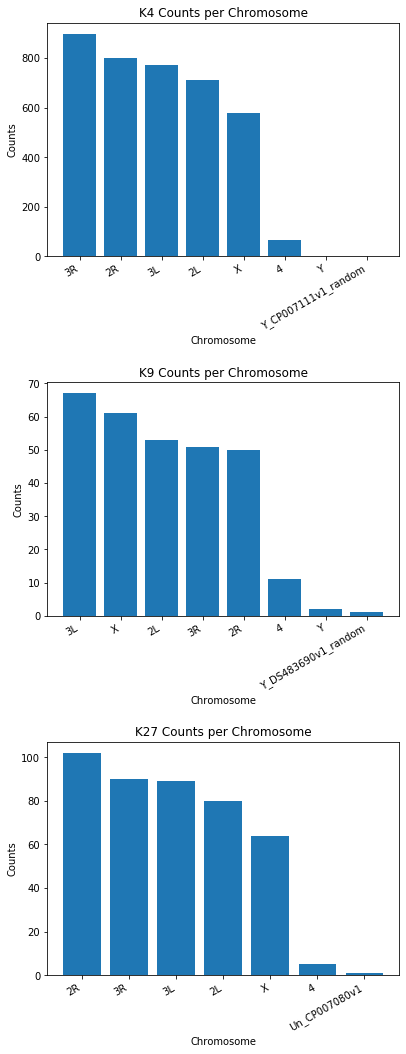

In [57]:
fig, ax = plt.subplots(nrows=3)

### plot the bar graphs of the various distributions
ax[0].bar(chr_k4.index, chr_k4 )
ax[1].bar(chr_k9.index,chr_k9 )
ax[2].bar(chr_k27.index,chr_k27)

# Set figure height
fig.set_figheight(15)

# Set title and x and y labels
ax[0].set_title("K4 Counts per Chromosome")
ax[0].set_xlabel("Chromosome")
ax[0].set_xticklabels(chr_k4.index,rotation = 30, ha = 'right')
ax[0].set_ylabel("Counts")

ax[1].set_title("K9 Counts per Chromosome")
ax[1].set_xlabel("Chromosome")
ax[1].set_xticklabels(chr_k9.index,rotation = 30, ha = 'right')
ax[1].set_ylabel("Counts")

ax[2].set_title("K27 Counts per Chromosome")
ax[2].set_xlabel("Chromosome")
ax[2].set_xticklabels(chr_k27.index,rotation = 30, ha = 'right')
ax[2].set_ylabel("Counts")

fig.tight_layout(pad=2.0)
plt.show()

# Widths

## Demo

In [58]:
df_k4.loc[:,"width"] = df_k4.loc[:,"end"] - df_k4.loc[:,"start"]
df_k4

,chr,start,end,width
0,3L,15823270,15830715,7445
1,2R,11451787,11459612,7825
2,3R,21665759,21673392,7633
3,2R,20324929,20331038,6109
4,3R,19859679,19864278,4599
5,X,16780987,16791625,10638
6,X,19681104,19685973,4869
7,3L,14781905,14791724,9819
8,2R,24868625,24876436,7811
9,2L,8081562,8085704,4142


In [59]:
df_k4.describe()

,start,end,width
count,3.830000e+03,3.830000e+03,3830.000000
mean,1.232288e+07,1.232466e+07,1779.086684
std,7.711626e+06,7.711810e+06,1927.396833
min,5.082000e+03,6.616000e+03,1.000000
25%,6.069285e+06,6.070038e+06,388.250000
50%,1.128937e+07,1.128951e+07,1114.000000
75%,1.828572e+07,1.828875e+07,2389.000000
max,3.206773e+07,3.206836e+07,15877.000000


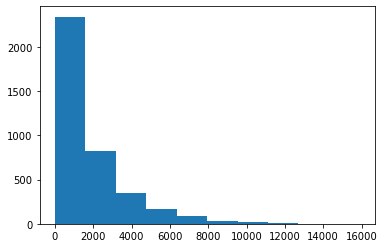

In [60]:
fig, ax = plt.subplots()
ax.hist( df_k4.loc[:,"width"] )
plt.show()

## Question 1: Subplot K9 K27

1. Plot K4, K9, and K27 width distributions on the same plot as subplots.

#### Load Distributions for K4, K9, and K27

In [65]:
df_k4.loc[:,"width"] = df_k4.loc[:,"end"] - df_k4.loc[:,"start"]
df_k9.loc[:,"width"] = df_k9.loc[:,"end"] - df_k9.loc[:,"start"]
df_k27.loc[:,"width"] = df_k27.loc[:,"end"] - df_k27.loc[:,"start"]

print(df_k4.describe())
print('\n')
print(df_k9.describe())
print('\n')
print(df_k27.describe())
print('\n')

              start           end         width
count  3.830000e+03  3.830000e+03   3830.000000
mean   1.232288e+07  1.232466e+07   1779.086684
std    7.711626e+06  7.711810e+06   1927.396833
min    5.082000e+03  6.616000e+03      1.000000
25%    6.069285e+06  6.070038e+06    388.250000
50%    1.128937e+07  1.128951e+07   1114.000000
75%    1.828572e+07  1.828875e+07   2389.000000
max    3.206773e+07  3.206836e+07  15877.000000


              start           end         width
count  2.960000e+02  2.960000e+02  2.960000e+02
mean   1.277585e+07  1.284479e+07  6.894818e+04
std    8.762886e+06  8.765068e+06  1.324318e+05
min    5.031000e+03  1.177500e+04  3.764000e+03
25%    4.908705e+06  4.979179e+06  1.873900e+04
50%    1.215959e+07  1.218991e+07  3.186400e+04
75%    2.061703e+07  2.071932e+07  6.208900e+04
max    3.206622e+07  3.207302e+07  1.174364e+06


              start           end          width
count  4.310000e+02  4.310000e+02     431.000000
mean   1.310978e+07  1.315782e+07 

#### Plot the widths in a histogram together using subplots


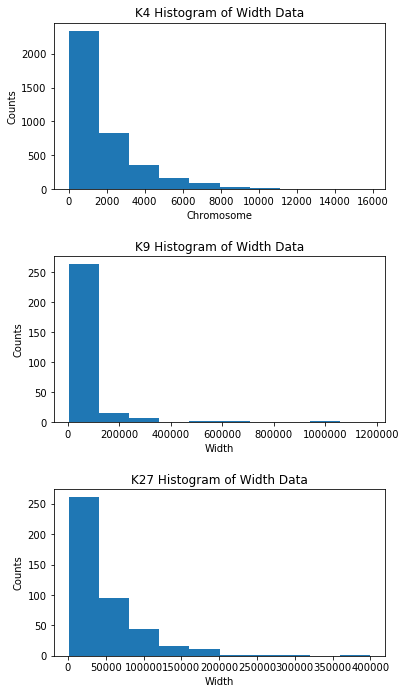

In [74]:
fig, ax = plt.subplots(3)

ax[0].hist(df_k4.loc[:,"width"] )
ax[1].hist(df_k9.loc[:,"width"])
ax[2].hist(df_k27.loc[:,"width"])

# Set figure height
fig.set_figheight(10)

# Set title and x and y labels
ax[0].set_title("K4 Histogram of Width Data")
ax[0].set_xlabel("Chromosome")
ax[0].set_ylabel("Counts")

ax[1].set_title("K9 Histogram of Width Data")
ax[1].set_xlabel("Width")
ax[1].set_ylabel("Counts")

ax[2].set_title("K27 Histogram of Width Data")
ax[2].set_xlabel("Width")
ax[2].set_ylabel("Counts")

fig.tight_layout(pad=2.0)
plt.show()

## Advanced: One plot

Can you find one or more ways to make an informative single plot with all three modifications?  Some suggestions:
- `np.log2()`
- `ax.hist( range, density, cumulative, histtype )`

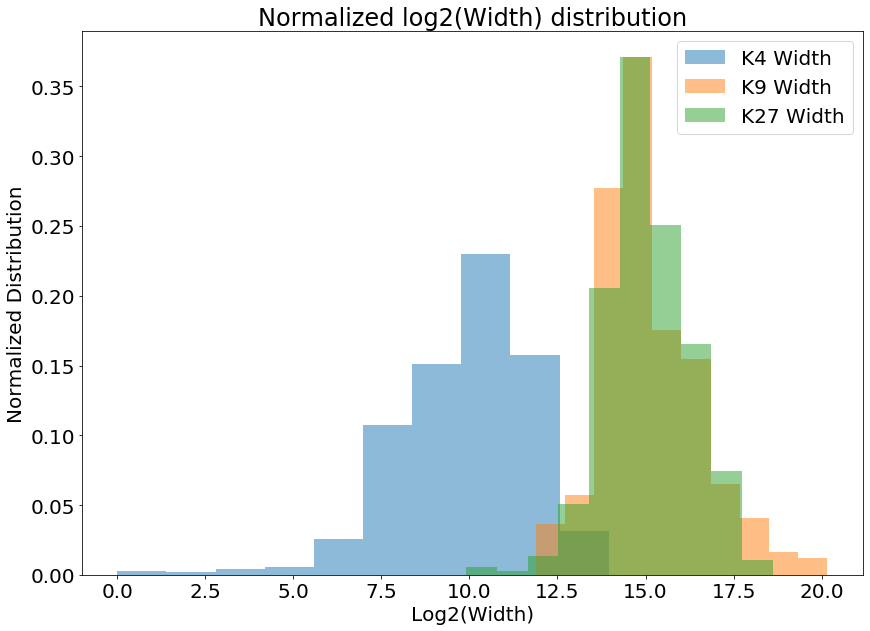

In [92]:
plt.figure(figsize=(14,10))
plt.hist(np.log2(df_k4.loc[:,"width"]),bins=10,alpha=0.5,density='True',label='K4 Width',histtype='bar')
plt.hist(np.log2(df_k9.loc[:,"width"]),bins=10,alpha=0.5,density='True',label='K9 Width',histtype='bar')
plt.hist(np.log2(df_k27.loc[:,"width"]),bins=10,alpha=0.5,density='True',label='K27 Width',histtype='bar')
plt.legend(loc='upper right',fontsize=20)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.xlabel('Log2(Width)',fontsize=20)
plt.ylabel('Normalized Distribution',fontsize=20)
title = "Normalized log2(Width) distribution"
plt.title(title,fontsize=24)
plt.show()

# Summary

1. Introduce pandas
    - `read_table()`
    - `.columns` `.index` `.values`
    - `.shape`
    - `.loc[]`
    - `.value_counts()`
    - Vectorized operations
    - `.describe()`
1. More matplotlib
    - `ax.bar()`
    - `ax.hist()`